In [2]:
# load models and features and test them

import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/david/Documents/mastersCode/ubm/final/tests/get_features', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [16]:
import utils
import matplotlib.pyplot as plt
import numpy as np
from whale.setup import get_data, constants, annotations
# from whale.setup.constants_01 import *
import importlib
importlib.reload(constants)

importlib.reload(get_data)
from final import useful
importlib.reload(useful)

from final.models.fhmm import FactorialHMM
from final.tests import decode_combine as dc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
importlib.reload(dc)
import numpy as np
import pandas as pd

class bnpy:
    pass

import pickle
import os
import glob

def find_pickle_files(directory):
    pickle_files = glob.glob(os.path.join(directory, '*.pkl'))
    return pickle_files

def results_for_models(trained_hmms, cv_data, display_labels, name='fig', path='', save=False, display_cm=True):
    combined_model = dc.DecodeCombineGaussian([hmm for hmm in trained_hmms.values()])
    _, test_pred, test_log_prob = combined_model.decode_hmmlearn(np.concatenate(cv_data['test_data']))

    true_test_labels = []
    for lab_index in range(len(cv_data['test_label'])):
        true_test_labels.append(np.ones(len(cv_data['test_data'][lab_index])) * cv_data['test_label'][lab_index])
    true_test_labels = np.concatenate(true_test_labels)

    cm = confusion_matrix(true_test_labels, test_pred, labels=[0,1,2,3,4,5], normalize='true')
    avg_cm = np.round(cm * 100000) / 1000

    if display_cm:
        disp = ConfusionMatrixDisplay(confusion_matrix=avg_cm,display_labels=display_labels)
        disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
        if save: plt.savefig(path + '/' + name)
        if name: plt.title(name)
        plt.show()

    avg_acc = np.sum(np.diag(cm)) / np.sum(cm)
    print(avg_acc)
    return avg_acc


def get_complete_time(some_results):
    temp_model_key = ''
    times = []
    for some_whale_key in some_results:
        some_whale_results_time = 0
        try:
            some_whale_results_time = some_results[some_whale_key]['total_time']
        except:
            pass
        times.append(some_whale_results_time)
    return temp_model_key, np.sum(times)

# feature_location = r'/Users/david/Documents/mastersCode/ubm/final/tests/get_features_humpback/mfcc_avg_5/cv_output_hpb_mfcc_norm.pkl'
# features_and_info = pickle.load(open(feature_location, 'rb'))
# cv_output = features_and_info['cv_output']
# label_map = features_and_info['label_map']
# num_map = features_and_info['num_map']
# labels_set = [key for key in label_map]

locs = r'/Users/david/Documents/mastersCode/ubm/final/tests/get_features/all_whale_results/'
folders = ['log_power', 'log_power_norm', 'mfcc', 'mfcc_norm']
loc = r'/Users/david/Documents/mastersCode/ubm/final/tests/get_features/all_whale_results/'

dicts_results = {}

for folder_loc in folders:

    models = {}
    results = {}
    features_and_info = None

    pickle_files = find_pickle_files(locs + folder_loc)
    # print("Pickle files found:", pickle_files)
    print('****')
    print('results for folder location: ', folder_loc)
    print('****')

    if len(pickle_files) > 0:
        for pickle_file in pickle_files:
            file_name = os.path.basename(pickle_file)
            if file_name.__contains__('model'):
                models[file_name] = pickle.load(open(pickle_file, 'rb'))
            if file_name.__contains__('cv_output'):
                features_and_info = pickle.load(open(pickle_file, 'rb'))
            if file_name.__contains__('result'):
                results[file_name] = pickle.load(open(pickle_file, 'rb'))

    cv_output = features_and_info['cv_output']
    label_map = features_and_info['label_map']
    num_map = features_and_info['num_map']
    labels_set = [key for key in label_map]

    metrics = {}
    for model_key in models:
        res_model = {}
        curr_model = models[model_key]
        res_model['acc'] = results_for_models(curr_model, cv_output, labels_set, model_key, save=False, display_cm=False)
        for key in results:
            if key[:5] == model_key[:5]:
                _, res_model['t'] = get_complete_time(results[key])
        metrics[model_key] = res_model

    # for key in results:
    #     print(get_complete_time(results[key]))

    df = pd.DataFrame(metrics)
        # df = pd.concat([df, df_new],  ignore_index=True)

    dicts_results[folder_loc] = df



****
results for folder location:  log_power
****
0.9555259841890845
0.9468636944240211
0.9537634199008664
0.8388639430104179
0.9021788480063903
****
results for folder location:  log_power_norm
****
0.900034243921081
0.9444493622664845
0.9030236558436776
0.8339767190257409
0.9036955328746896
****
results for folder location:  mfcc
****
0.8796297062303208
0.8955320954064571
0.8830659412999179
0.7677508979429825
0.8234716712006571
****
results for folder location:  mfcc_norm
****
0.8646050961277045
0.8512375710932856
0.8644814935653637
0.7579457005036412
0.8421043339468454


In [12]:
concatenated_df = pd.concat(dicts_results.values(), axis=0, ignore_index=True)

In [18]:

model_keys = [key for key in models]

dicts_results['log_power']['hmmlearn_models.pkl']['acc']

0.9468636944240211

In [4]:
# trained_hmms_inf = pickle.load(open(trained_hmms_inf_path, 'rb'))
# trained_hmms_fin = pickle.load(open(trained_hmms_fin_path, 'rb'))
# trained_hmms_em = pickle.load(open(trained_hmms_em_path, 'rb'))
# trained_hmms_wl_inf = pickle.load(open(trained_hmms_wl_inf, 'rb'))
# trained_hmms_bhmm = pickle.load(open(trained_hmms_bhmm, 'rb'))

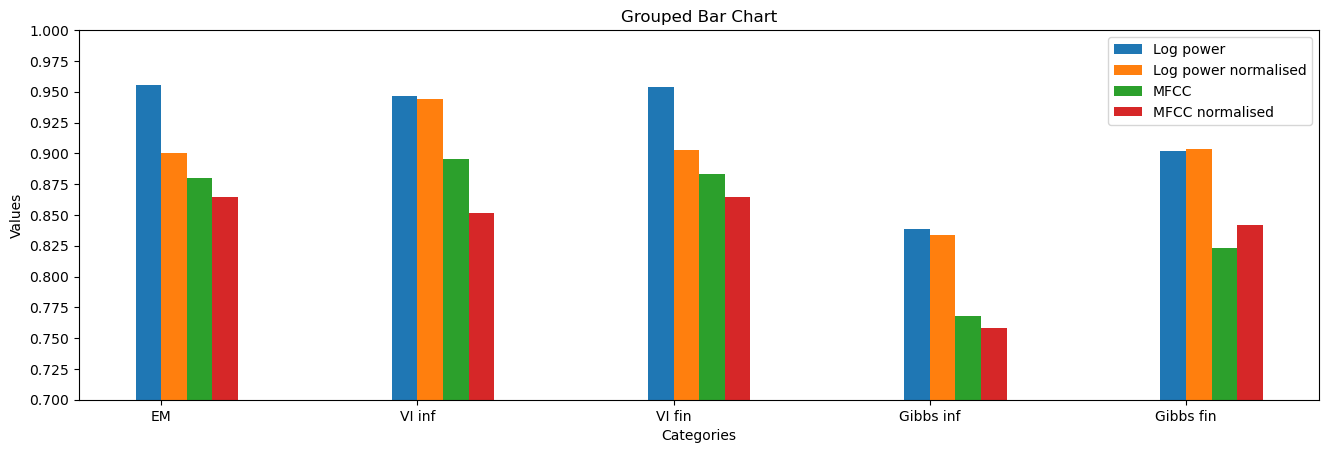

In [43]:

# Sample data
multiplier = 1
categories = ['EM', 'VI inf', 'VI fin', 'Gibbs inf', 'Gibbs fin']
values_group1 = [dicts_results['log_power'][key]['acc'] * multiplier for key in model_keys] # [10, 15, 20, 15, 20] # all log results
values_group2 = [dicts_results['log_power_norm'][key]['acc'] * multiplier for key in model_keys]
values_group3 = [dicts_results['mfcc'][key]['acc'] * multiplier for key in model_keys]
values_group4 = [dicts_results['mfcc_norm'][key]['acc'] * multiplier for key in model_keys]


# Set up positions for the bars on X-axis
bar_width = 0.1
index = np.arange(len(categories))

# Create the grouped bar chart
plt.bar(index, values_group1, width=bar_width, label='Log power')
plt.bar(index + bar_width, values_group2, width=bar_width, label='Log power normalised')
plt.bar(index + ( 2 * bar_width), values_group3, width=bar_width, label='MFCC')
plt.bar(index + ( 3 * bar_width), values_group4, width=bar_width, label='MFCC normalised')

# Add labels, title, and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Grouped Bar Chart')
plt.xticks(index + bar_width / 2, categories)
plt.yticks(np.arange(0.70,1,0.025))
plt.ylim(0.70, 1)
plt.legend()

# Show the plot
plt.show()

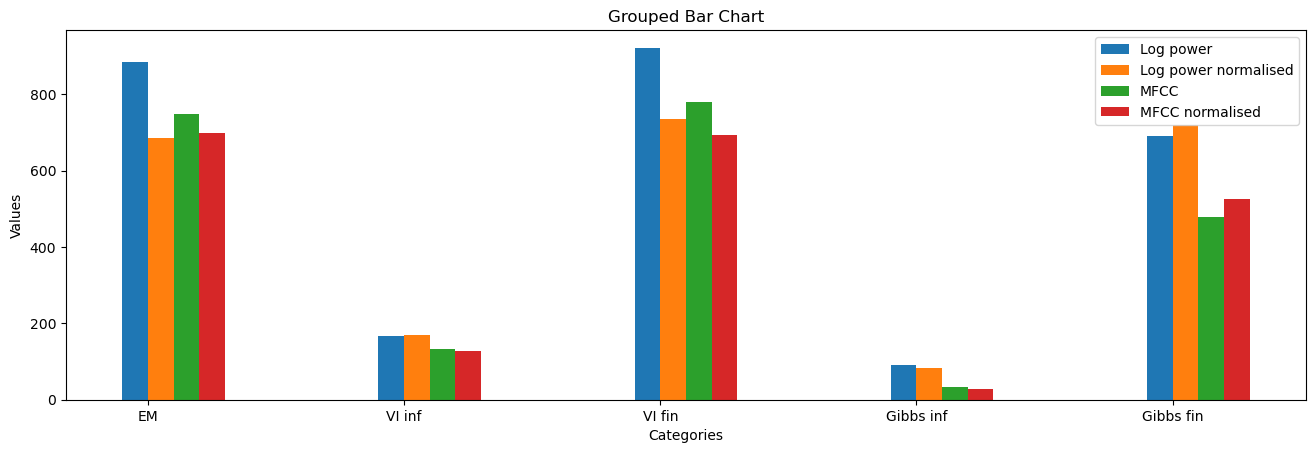

In [45]:

# Sample data
multiplier = 1
categories = ['EM', 'VI inf', 'VI fin', 'Gibbs inf', 'Gibbs fin']
values_group1 = [dicts_results['log_power'][key]['t'] * multiplier for key in model_keys] # [10, 15, 20, 15, 20] # all log results
values_group2 = [dicts_results['log_power_norm'][key]['t'] * multiplier for key in model_keys]
values_group3 = [dicts_results['mfcc'][key]['t'] * multiplier for key in model_keys]
values_group4 = [dicts_results['mfcc_norm'][key]['t'] * multiplier for key in model_keys]


# Set up positions for the bars on X-axis
bar_width = 0.1
index = np.arange(len(categories))

# Create the grouped bar chart
plt.bar(index, values_group1, width=bar_width, label='Log power')
plt.bar(index + bar_width, values_group2, width=bar_width, label='Log power normalised')
plt.bar(index + ( 2 * bar_width), values_group3, width=bar_width, label='MFCC')
plt.bar(index + ( 3 * bar_width), values_group4, width=bar_width, label='MFCC normalised')

# Add labels, title, and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Grouped Bar Chart')
plt.xticks(index + bar_width / 2, categories)
# plt.yticks(np.arange(0.70,1,0.025))
# plt.ylim(0.70, 1)
plt.legend()

# Show the plot
plt.show()